In [114]:
# This notebook will read and manually annotate the images in the great barrier
# reef dataset with the ground truth. This will help us to get a better intuition for the problem.

import glob, os, json, imageio
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('agg')
from matplotlib import image, patches
from matplotlib.pyplot import *

In [102]:
# Load in the annotated ground truth
ground_truth=pd.read_csv('tensorflow-great-barrier-reef/train.csv')
print(ground_truth)

       video_id  sequence  video_frame  sequence_frame image_id annotations
0             0     40258            0               0      0-0          []
1             0     40258            1               1      0-1          []
2             0     40258            2               2      0-2          []
3             0     40258            3               3      0-3          []
4             0     40258            4               4      0-4          []
...         ...       ...          ...             ...      ...         ...
23496         2     29859        10755            2983  2-10755          []
23497         2     29859        10756            2984  2-10756          []
23498         2     29859        10757            2985  2-10757          []
23499         2     29859        10758            2986  2-10758          []
23500         2     29859        10759            2987  2-10759          []

[23501 rows x 6 columns]


In [109]:
def get_annotations(index):
    st = ground_truth['annotations'][index].replace('\'', '\"')
    return json.loads(st)

def get_filename(index):
    return 'tensorflow-great-barrier-reef/train_images/video_%d/%d.jpg'%(
        ground_truth['video_id'][index], ground_truth['video_frame'][index]
    )

In [113]:
# Only consider every 4th image to save a bit of time / disk space.
skip = 4

for index in range(0,len(ground_truth),skip):

    # Monitor progress
    if(index % 256 == 0):
        print(ground_truth[index:index+1])
    
    # Do the plotting
    filename=get_filename(index)
    figure(figsize=(16,9))
    imshow(image.imread(filename))
    for annotation in get_annotations(index):
        rect = patches.Rectangle((annotation['x'], annotation['y']), 
                             annotation['width'], annotation['height'], 
                             linewidth=4, edgecolor='y', facecolor='none')
        gca().add_patch(rect)
    gca().grid('True')
    tight_layout()
    savefig(filename.replace('train_images', 'train_images_annotated'))
    close('all')

   video_id  sequence  video_frame  sequence_frame image_id annotations
0         0     40258            0               0      0-0          []
    video_id  sequence  video_frame  sequence_frame image_id  \
64         0     40258           64              64     0-64   

                                          annotations  
64  [{'x': 458, 'y': 16, 'width': 57, 'height': 57...  
     video_id  sequence  video_frame  sequence_frame image_id  \
128         0     40258          128             128    0-128   

                                          annotations  
128  [{'x': 664, 'y': 12, 'width': 29, 'height': 30}]  
     video_id  sequence  video_frame  sequence_frame image_id annotations
192         0     40258          192             192    0-192          []
     video_id  sequence  video_frame  sequence_frame image_id  \
256         0     40258          256             256    0-256   

                                           annotations  
256  [{'x': 920, 'y': 319, 'width': 

      video_id  sequence  video_frame  sequence_frame image_id  \
2944         0      8399         4867            1129   0-4867   

                                            annotations  
2944  [{'x': 306, 'y': 436, 'width': 66, 'height': 56}]  
      video_id  sequence  video_frame  sequence_frame image_id annotations
3008         0      8399         4931            1193   0-4931          []
      video_id  sequence  video_frame  sequence_frame image_id  \
3072         0      8399         4995            1257   0-4995   

                                           annotations  
3072  [{'x': 551, 'y': 39, 'width': 50, 'height': 29}]  
      video_id  sequence  video_frame  sequence_frame image_id annotations
3136         0      8399         5059            1321   0-5059          []
      video_id  sequence  video_frame  sequence_frame image_id annotations
3200         0      8399         5123            1385   0-5123          []
      video_id  sequence  video_frame  sequence_frame 

      video_id  sequence  video_frame  sequence_frame image_id annotations
5824         0       996        11464              39  0-11464          []
      video_id  sequence  video_frame  sequence_frame image_id annotations
5888         0       996        11528             103  0-11528          []
      video_id  sequence  video_frame  sequence_frame image_id annotations
5952         0       996        11592             167  0-11592          []
      video_id  sequence  video_frame  sequence_frame image_id annotations
6016         0       996        11656             231  0-11656          []
      video_id  sequence  video_frame  sequence_frame image_id annotations
6080         0       996        11720             295  0-11720          []
      video_id  sequence  video_frame  sequence_frame image_id annotations
6144         0       996        11784             359  0-11784          []
      video_id  sequence  video_frame  sequence_frame image_id annotations
6208         0       996 

      video_id  sequence  video_frame  sequence_frame image_id annotations
9152         1      8503         4000             172   1-4000          []
      video_id  sequence  video_frame  sequence_frame image_id  \
9216         1      8503         4064             236   1-4064   

                                            annotations  
9216  [{'x': 136, 'y': 241, 'width': 44, 'height': 32}]  
      video_id  sequence  video_frame  sequence_frame image_id  \
9280         1      8503         4128             300   1-4128   

                                            annotations  
9280  [{'x': 956, 'y': 178, 'width': 56, 'height': 3...  
      video_id  sequence  video_frame  sequence_frame image_id  \
9344         1      8503         4192             364   1-4192   

                                            annotations  
9344  [{'x': 354, 'y': 292, 'width': 39, 'height': 2...  
      video_id  sequence  video_frame  sequence_frame image_id  \
9408         1      8503         4256

       video_id  sequence  video_frame  sequence_frame image_id  \
11904         1     17665         6855              10   1-6855   

                                             annotations  
11904  [{'x': 536, 'y': 529, 'width': 67, 'height': 6...  
       video_id  sequence  video_frame  sequence_frame image_id  \
11968         1     17665         6919              74   1-6919   

                                             annotations  
11968  [{'x': 437, 'y': 627, 'width': 71, 'height': 6...  
       video_id  sequence  video_frame  sequence_frame image_id annotations
12032         1     60754         8467              51   1-8467          []
       video_id  sequence  video_frame  sequence_frame image_id annotations
12096         1     60754         8531             115   1-8531          []
       video_id  sequence  video_frame  sequence_frame image_id annotations
12160         1     60754         8595             179   1-8595          []
       video_id  sequence  video_frame

       video_id  sequence  video_frame  sequence_frame image_id annotations
14848         1     60754        11283            2867  1-11283          []
       video_id  sequence  video_frame  sequence_frame image_id annotations
14912         1     60754        11347            2931  1-11347          []
       video_id  sequence  video_frame  sequence_frame image_id annotations
14976         2     37114           36              36     2-36          []
       video_id  sequence  video_frame  sequence_frame image_id annotations
15040         2     37114          100             100    2-100          []
       video_id  sequence  video_frame  sequence_frame image_id annotations
15104         2     37114          164             164    2-164          []
       video_id  sequence  video_frame  sequence_frame image_id annotations
15168         2     37114          228             228    2-228          []
       video_id  sequence  video_frame  sequence_frame image_id annotations
15232       

       video_id  sequence  video_frame  sequence_frame image_id annotations
18304         2     26651         4236             564   2-4236          []
       video_id  sequence  video_frame  sequence_frame image_id annotations
18368         2     26651         4300             628   2-4300          []
       video_id  sequence  video_frame  sequence_frame image_id annotations
18432         2     26651         4364             692   2-4364          []
       video_id  sequence  video_frame  sequence_frame image_id annotations
18496         2     26651         4428             756   2-4428          []
       video_id  sequence  video_frame  sequence_frame image_id annotations
18560         2     26651         4492             820   2-4492          []
       video_id  sequence  video_frame  sequence_frame image_id annotations
18624         2     26651         4556             884   2-4556          []
       video_id  sequence  video_frame  sequence_frame image_id annotations
18688       

       video_id  sequence  video_frame  sequence_frame image_id annotations
21376         2     29859         8635             863   2-8635          []
       video_id  sequence  video_frame  sequence_frame image_id annotations
21440         2     29859         8699             927   2-8699          []
       video_id  sequence  video_frame  sequence_frame image_id annotations
21504         2     29859         8763             991   2-8763          []
       video_id  sequence  video_frame  sequence_frame image_id annotations
21568         2     29859         8827            1055   2-8827          []
       video_id  sequence  video_frame  sequence_frame image_id annotations
21632         2     29859         8891            1119   2-8891          []
       video_id  sequence  video_frame  sequence_frame image_id annotations
21696         2     29859         8955            1183   2-8955          []
       video_id  sequence  video_frame  sequence_frame image_id annotations
21760       

In [120]:
# Convert things to .mp4 to look through them

for video in range(3):

    writer = imageio.get_writer('tensorflow-great-barrier-reef/train_images_annotated/video_%d.mp4'%video, fps=4)
    for im in sorted(glob.glob('tensorflow-great-barrier-reef/train_images_annotated/video_%d/*.jpg'%video), 
                                key=lambda x: int(os.path.basename(x).replace('.jpg', ''))):
        writer.append_data(imageio.imread(im))
    writer.close()

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1152, 648) to (1152, 656) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


tensorflow-great-barrier-reef/train_images_annotated/video_0/0.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/4.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/8.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/12.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/16.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/20.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/24.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/28.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/32.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/36.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/40.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/44.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/48.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/52.jpg
tensorflow-great-barrier-reef/train_images_annotate

tensorflow-great-barrier-reef/train_images_annotated/video_0/897.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/901.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/905.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/909.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/913.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/917.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/921.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/925.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/929.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/933.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/937.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/941.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/945.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/949.jpg
tensorflow-great-barrier-reef/trai

tensorflow-great-barrier-reef/train_images_annotated/video_0/1369.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/1373.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/1377.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/1381.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/1385.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/1389.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/1393.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/1397.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/1401.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/1405.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/1409.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/1413.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/1417.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/1421.jpg
tensorflow-great-bar

tensorflow-great-barrier-reef/train_images_annotated/video_0/2021.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/2025.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/2029.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/2033.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/2037.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/2041.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/2045.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/2049.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/2053.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/2057.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/2061.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/2065.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/2069.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/2073.jpg
tensorflow-great-bar

tensorflow-great-barrier-reef/train_images_annotated/video_0/3863.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/3867.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/3871.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/3875.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/3879.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/3883.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/3887.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/3891.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/3895.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/3899.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/3903.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/3907.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/3911.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/3915.jpg
tensorflow-great-bar

tensorflow-great-barrier-reef/train_images_annotated/video_0/4339.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/4343.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/4347.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/4351.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/4355.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/4359.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/4363.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/4367.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/4371.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/4375.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/4379.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/4383.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/4387.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/4391.jpg
tensorflow-great-bar

tensorflow-great-barrier-reef/train_images_annotated/video_0/4815.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/4819.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/4823.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/4827.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/4831.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/4835.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/4839.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/4843.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/4847.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/4851.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/4855.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/4859.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/4863.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/4867.jpg
tensorflow-great-bar

tensorflow-great-barrier-reef/train_images_annotated/video_0/5852.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/5856.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/5860.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/5864.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/5868.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/5872.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/5876.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/5880.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/5884.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/5888.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/5892.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/5896.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/5900.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/5904.jpg
tensorflow-great-bar

tensorflow-great-barrier-reef/train_images_annotated/video_0/7671.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/7675.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/7679.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/7683.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/7687.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/7691.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/7695.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/7699.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/7703.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/7707.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/7711.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/7715.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/7719.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/7723.jpg
tensorflow-great-bar

tensorflow-great-barrier-reef/train_images_annotated/video_0/8171.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/8175.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/8179.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/8183.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/8187.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/8191.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/8195.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/8199.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/8203.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/8207.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/8211.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/8215.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/8219.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/8223.jpg
tensorflow-great-bar

tensorflow-great-barrier-reef/train_images_annotated/video_0/9029.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/9033.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/9037.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/9041.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/9045.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/9049.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/9053.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/9057.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/9061.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/9065.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/9069.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/9073.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/9077.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/9081.jpg
tensorflow-great-bar

tensorflow-great-barrier-reef/train_images_annotated/video_0/9509.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/9513.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/9517.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/9521.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/9525.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/9529.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/9533.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/9537.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/9541.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/9545.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/9549.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/9553.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/9557.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/9561.jpg
tensorflow-great-bar

tensorflow-great-barrier-reef/train_images_annotated/video_0/11448.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/11452.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/11456.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/11460.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/11464.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/11468.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/11472.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/11476.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/11480.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/11484.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/11488.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/11492.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/11496.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/11500.jpg
tensor

tensorflow-great-barrier-reef/train_images_annotated/video_0/11944.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/11948.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/11952.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/11956.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/11960.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/11964.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/11968.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/11972.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/11976.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/11980.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/11984.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/11988.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/11992.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_0/11996.jpg
tensor

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1152, 648) to (1152, 656) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


tensorflow-great-barrier-reef/train_images_annotated/video_1/0.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/4.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/8.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/12.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/16.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/20.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/24.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/28.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/32.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/36.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/40.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/44.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/48.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/52.jpg
tensorflow-great-barrier-reef/train_images_annotate

tensorflow-great-barrier-reef/train_images_annotated/video_1/508.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/512.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/516.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/520.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/524.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/528.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/532.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/536.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/540.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/544.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/548.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/552.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/556.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/560.jpg
tensorflow-great-barrier-reef/trai

tensorflow-great-barrier-reef/train_images_annotated/video_1/1008.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/1012.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/1016.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/1020.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/1024.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/1028.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/1032.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/1036.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/1040.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/1044.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/1048.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/1052.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/1056.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/1060.jpg
tensorflow-great-bar

tensorflow-great-barrier-reef/train_images_annotated/video_1/2120.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/2124.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/2128.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/2132.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/2136.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/2140.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/2144.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/2148.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/2152.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/2156.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/2160.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/2164.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/2168.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/2172.jpg
tensorflow-great-bar

tensorflow-great-barrier-reef/train_images_annotated/video_1/2596.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/2600.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/2604.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/2608.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/2612.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/2616.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/2620.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/2624.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/2628.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/2632.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/2636.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/2640.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/2644.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/2648.jpg
tensorflow-great-bar

tensorflow-great-barrier-reef/train_images_annotated/video_1/4048.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/4052.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/4056.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/4060.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/4064.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/4068.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/4072.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/4076.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/4080.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/4084.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/4088.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/4092.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/4096.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/4100.jpg
tensorflow-great-bar

tensorflow-great-barrier-reef/train_images_annotated/video_1/4552.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/4556.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/4560.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/4564.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/4568.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/4572.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/4576.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/4580.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/4584.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/4588.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/4592.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/4596.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/4600.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/4604.jpg
tensorflow-great-bar

tensorflow-great-barrier-reef/train_images_annotated/video_1/5036.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/5040.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/5044.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/5048.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/5052.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/5056.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/5060.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/5064.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/5068.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/5072.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/5076.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/5080.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/5084.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/5088.jpg
tensorflow-great-bar

tensorflow-great-barrier-reef/train_images_annotated/video_1/5524.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/5528.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/5532.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/5536.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/5540.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/5544.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/5548.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/5552.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/5556.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/5560.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/5564.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/5568.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/5572.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/5576.jpg
tensorflow-great-bar

tensorflow-great-barrier-reef/train_images_annotated/video_1/6004.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/6008.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/6012.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/6016.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/6020.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/6024.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/6028.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/6032.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/6036.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/6040.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/6044.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/6048.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/6052.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/6056.jpg
tensorflow-great-bar

tensorflow-great-barrier-reef/train_images_annotated/video_1/6508.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/6512.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/6516.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/6520.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/6524.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/6528.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/6532.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/6536.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/6540.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/6544.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/6548.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/6552.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/6556.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/6560.jpg
tensorflow-great-bar

tensorflow-great-barrier-reef/train_images_annotated/video_1/8575.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/8579.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/8583.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/8587.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/8591.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/8595.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/8599.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/8603.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/8607.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/8611.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/8615.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/8619.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/8623.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/8627.jpg
tensorflow-great-bar

tensorflow-great-barrier-reef/train_images_annotated/video_1/9075.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/9079.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/9083.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/9087.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/9091.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/9095.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/9099.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/9103.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/9107.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/9111.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/9115.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/9119.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/9123.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/9127.jpg
tensorflow-great-bar

tensorflow-great-barrier-reef/train_images_annotated/video_1/9555.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/9559.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/9563.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/9567.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/9571.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/9575.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/9579.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/9583.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/9587.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/9591.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/9595.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/9599.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/9603.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/9607.jpg
tensorflow-great-bar

tensorflow-great-barrier-reef/train_images_annotated/video_1/10043.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/10047.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/10051.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/10055.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/10059.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/10063.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/10067.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/10071.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/10075.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/10079.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/10083.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/10087.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/10091.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/10095.jpg
tensor

tensorflow-great-barrier-reef/train_images_annotated/video_1/10531.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/10535.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/10539.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/10543.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/10547.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/10551.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/10555.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/10559.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/10563.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/10567.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/10571.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/10575.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/10579.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/10583.jpg
tensor

tensorflow-great-barrier-reef/train_images_annotated/video_1/11015.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/11019.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/11023.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/11027.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/11031.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/11035.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/11039.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/11043.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/11047.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/11051.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/11055.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/11059.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/11063.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_1/11067.jpg
tensor

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1152, 648) to (1152, 656) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


tensorflow-great-barrier-reef/train_images_annotated/video_2/0.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/4.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/8.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/12.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/16.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/20.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/24.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/28.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/32.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/36.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/40.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/44.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/48.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/52.jpg
tensorflow-great-barrier-reef/train_images_annotate

tensorflow-great-barrier-reef/train_images_annotated/video_2/480.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/484.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/488.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/492.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/496.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/500.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/504.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/508.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/512.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/516.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/520.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/524.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/528.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/532.jpg
tensorflow-great-barrier-reef/trai

tensorflow-great-barrier-reef/train_images_annotated/video_2/976.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/980.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/984.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/988.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/992.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/996.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/1000.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/1004.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/1008.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/1012.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/1016.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/1020.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/1024.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/1028.jpg
tensorflow-great-barrier-r

tensorflow-great-barrier-reef/train_images_annotated/video_2/1476.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/1480.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/1484.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/1488.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/1492.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/1496.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/1500.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/1504.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/1508.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/1512.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/1516.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/1520.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/1524.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/1528.jpg
tensorflow-great-bar

tensorflow-great-barrier-reef/train_images_annotated/video_2/1952.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/1956.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/1960.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/1964.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/1968.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/1972.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/1976.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/1980.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/1984.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/1988.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/1992.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/1996.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/2000.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/2004.jpg
tensorflow-great-bar

tensorflow-great-barrier-reef/train_images_annotated/video_2/2444.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/2448.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/2452.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/2456.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/2460.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/2464.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/2468.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/2472.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/2476.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/2480.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/2484.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/2488.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/2492.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/2496.jpg
tensorflow-great-bar

tensorflow-great-barrier-reef/train_images_annotated/video_2/3800.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/3804.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/3808.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/3812.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/3816.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/3820.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/3824.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/3828.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/3832.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/3836.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/3840.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/3844.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/3848.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/3852.jpg
tensorflow-great-bar

tensorflow-great-barrier-reef/train_images_annotated/video_2/4296.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/4300.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/4304.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/4308.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/4312.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/4316.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/4320.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/4324.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/4328.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/4332.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/4336.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/4340.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/4344.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/4348.jpg
tensorflow-great-bar

tensorflow-great-barrier-reef/train_images_annotated/video_2/4780.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/4784.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/4788.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/4792.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/4796.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/4800.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/4804.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/4808.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/4812.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/4816.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/4820.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/4824.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/4828.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/4832.jpg
tensorflow-great-bar

tensorflow-great-barrier-reef/train_images_annotated/video_2/5454.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/5458.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/5462.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/5466.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/5470.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/5474.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/5478.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/5482.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/5486.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/5490.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/5494.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/5498.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/5502.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/5506.jpg
tensorflow-great-bar

tensorflow-great-barrier-reef/train_images_annotated/video_2/5926.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/5930.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/5934.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/5938.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/5942.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/5946.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/5950.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/5954.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/5958.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/5962.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/5966.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/5970.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/5974.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/5978.jpg
tensorflow-great-bar

tensorflow-great-barrier-reef/train_images_annotated/video_2/6402.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/6406.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/6410.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/6414.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/6418.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/6422.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/6426.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/6430.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/6434.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/6438.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/6442.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/6446.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/6450.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/6454.jpg
tensorflow-great-bar

tensorflow-great-barrier-reef/train_images_annotated/video_2/8039.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/8043.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/8047.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/8051.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/8055.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/8059.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/8063.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/8067.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/8071.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/8075.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/8079.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/8083.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/8087.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/8091.jpg
tensorflow-great-bar

tensorflow-great-barrier-reef/train_images_annotated/video_2/8515.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/8519.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/8523.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/8527.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/8531.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/8535.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/8539.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/8543.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/8547.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/8551.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/8555.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/8559.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/8563.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/8567.jpg
tensorflow-great-bar

tensorflow-great-barrier-reef/train_images_annotated/video_2/9011.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/9015.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/9019.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/9023.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/9027.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/9031.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/9035.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/9039.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/9043.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/9047.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/9051.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/9055.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/9059.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/9063.jpg
tensorflow-great-bar

tensorflow-great-barrier-reef/train_images_annotated/video_2/9495.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/9499.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/9503.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/9507.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/9511.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/9515.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/9519.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/9523.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/9527.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/9531.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/9535.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/9539.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/9543.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/9547.jpg
tensorflow-great-bar

tensorflow-great-barrier-reef/train_images_annotated/video_2/9971.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/9975.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/9979.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/9983.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/9987.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/9991.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/9995.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/9999.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/10003.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/10007.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/10011.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/10015.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/10019.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/10023.jpg
tensorflow-gre

tensorflow-great-barrier-reef/train_images_annotated/video_2/10463.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/10467.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/10471.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/10475.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/10479.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/10483.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/10487.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/10491.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/10495.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/10499.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/10503.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/10507.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/10511.jpg
tensorflow-great-barrier-reef/train_images_annotated/video_2/10515.jpg
tensor

In [141]:
# Now let's explore the overall shape / aspect ratios of the boxes

annotations=[]
annotation_ct=[]

for index in range(0,len(ground_truth)):
    local_annotation=get_annotations(index)
    annotation_ct.append(len(local_annotation))
    for annotation in local_annotation:
        annotations.append(annotation)

annotations = np.stack([[annotation[key] for annotation in annotations] for key in ['x', 'y', 'height', 'width']])

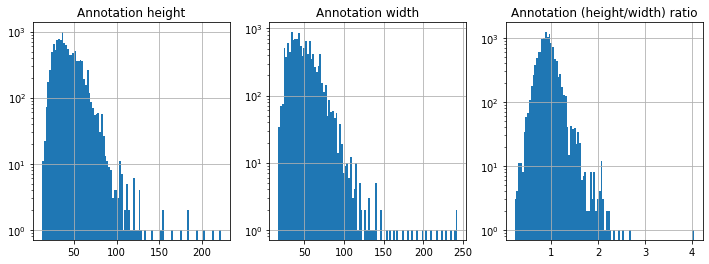

In [142]:
# Plot this up, to be used in the layout of the Faster R-CNN region proposal network

fig, axs = subplots(1, 3, figsize=(12, 4))

axs[0].hist(annotations[2,:], bins=100)
axs[0].set_title('Annotation height')
axs[0].set_yscale('log')
axs[0].grid(True)

axs[1].hist(annotations[3,:], bins=100)
axs[1].set_title('Annotation width')
axs[1].set_yscale('log')
axs[1].grid(True)

axs[2].hist(annotations[2,:] / annotations[3,:], bins=100)
axs[2].set_title('Annotation (height/width) ratio')
axs[2].set_yscale('log')
axs[2].grid(True)

(0.0, 720.0)

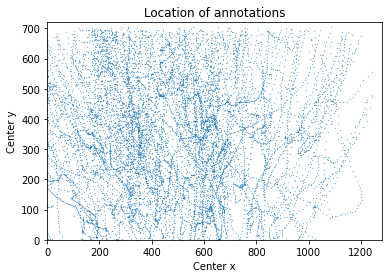

In [150]:
# The annotations should be evenly distributed in (x, y) 

figure()
scatter(annotations[0,:], annotations[1,:], marker='.', s=0.2)
title('Location of annotations')
xlabel('Center x')
ylabel('Center y')
xlim(0, 1280)
ylim(0,720)

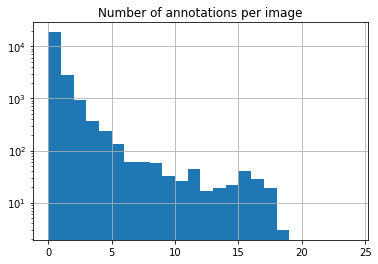

In [152]:
# Finally, let's check the statistics of the number of annotations per image

figure()
hist(np.array(annotation_ct), bins=np.arange(0,25))
title('Number of annotations per image')
gca().grid(True)
yscale('log')